## Multilabel Classification Model for Cataract Detection

### Installing Dependencies

In [5]:
!pip install pandas scikit-learn keras numpy tqdm


### Importing Libraries

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [7]:
images_directory = 'dataset/images/'

In [8]:
df = pd.read_csv('dataset/labels.csv')

In [9]:
df.head()

,name,category,type,grade
0,1.jpg,0,4,3
1,2.jpg,0,4,3
2,3.jpg,0,2,2
3,4.jpg,0,2,1
4,5.jpg,0,1,3


In [10]:
df.columns

Index(['name', 'category', 'type', 'grade'], dtype='object')

In [11]:
df.shape[0]

712

### Preparing the Data

In [12]:
# resize all images to 200x200
SIZE = 200
X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(images_directory + df['name'][i], target_size=(SIZE, SIZE, 3))
    img = image.img_to_array(img)
    img = img/255
    X_dataset.append(img)

100%|██████████| 712/712 [00:13<00:00, 53.78it/s]


In [13]:
X_dataset

[array([[[0.00784314, 0.01568628, 0.0627451 ],
         [0.01568628, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.07058824],
         ...,
         [0.00784314, 0.01568628, 0.06666667],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],
 
        [[0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01568628, 0.03137255, 0.07843138],
         ...,
         [0.01960784, 0.03529412, 0.13333334],
         [0.00392157, 0.01960784, 0.06666667],
         [0.00784314, 0.02352941, 0.06666667]],
 
        [[0.02352941, 0.02352941, 0.07058824],
         [0.01176471, 0.01960784, 0.07058824],
         [0.01176471, 0.02745098, 0.07450981],
         ...,
         [0.00392157, 0.01960784, 0.13333334],
         [0.00784314, 0.03137255, 0.13333334],
         [0.00392157, 0.01960784, 0.06666667]],
 
        ...,
 
        [[0.00392157, 0.02352941, 0.04705882],
         [0.00392157, 0.01960784, 0.05490

In [14]:
X = np.array(X_dataset)

In [15]:
X

array([[[[0.00784314, 0.01568628, 0.0627451 ],
         [0.01568628, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.07058824],
         ...,
         [0.00784314, 0.01568628, 0.06666667],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],

        [[0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01568628, 0.03137255, 0.07843138],
         ...,
         [0.01960784, 0.03529412, 0.13333334],
         [0.00392157, 0.01960784, 0.06666667],
         [0.00784314, 0.02352941, 0.06666667]],

        [[0.02352941, 0.02352941, 0.07058824],
         [0.01176471, 0.01960784, 0.07058824],
         [0.01176471, 0.02745098, 0.07450981],
         ...,
         [0.00392157, 0.01960784, 0.13333334],
         [0.00784314, 0.03137255, 0.13333334],
         [0.00392157, 0.01960784, 0.06666667]],

        ...,

        [[0.00392157, 0.02352941, 0.04705882],
         [0.00392157, 0.01960784, 0.05490196]

In [16]:
X.shape

(712, 200, 200, 3)

In [17]:
(df['name'][44], df['category'][44], df['type'][44], df['grade'][44])

('45.jpg', 0, 4, 2)

In [18]:
y = np.array(df.drop(['name'],axis=1))

In [19]:
y

array([[0, 4, 3],
       [0, 4, 3],
       [0, 2, 2],
       ...,
       [2, 1, 4],
       [2, 3, 4],
       [2, 4, 4]])

In [20]:
y.shape

(712, 3)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((569, 200, 200, 3), (569, 3)), ((143, 200, 200, 3), (143, 3)))

### Creating the Model

In [23]:
model = Sequential()

2023-03-31 22:05:27.485010: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-03-31 22:05:27.485332: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-31 22:05:27.485385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ELEVEN): /proc/driver/nvidia/version does not exist
2023-03-31 22:05:27.486067: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 196, 196, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 32)       0

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 [==============================] - 14s 645ms/step - loss: -63.6861 - accuracy: 0.5712 - val_loss: -21.0882 - val_accuracy: 0.8531
Epoch 2/10
18/18 [==============================] - 12s 683ms/step - loss: -733.7634 - accuracy: 0.6046 - val_loss: -171.4462 - val_accuracy: 0.8531
Epoch 3/10
18/18 [==============================] - 12s 673ms/step - loss: -3290.6113 - accuracy: 0.6995 - val_loss: -690.2445 - val_accuracy: 0.8531
Epoch 4/10
18/18 [==============================] - 15s 821ms/step - loss: -10204.1484 - accuracy: 0.6960 - val_loss: -2659.3218 - val_accuracy: 0.8531
Epoch 5/10
18/18 [==============================] - 13s 709ms/step - loss: -25917.8438 - accuracy: 0.7381 - val_loss: -2735.4307 - val_accuracy: 0.7692
Epoch 6/10
18/18 [==============================] - 12s 659ms/step - loss: -55598.6875 - accuracy: 0.7223 - val_loss: -6874.4224 - val_accuracy: 0.8252
Epoch 7/10
18/18 [==============================] - 11s 625ms/step - loss: -108981.9375 - accuracy

### Plotting the Model

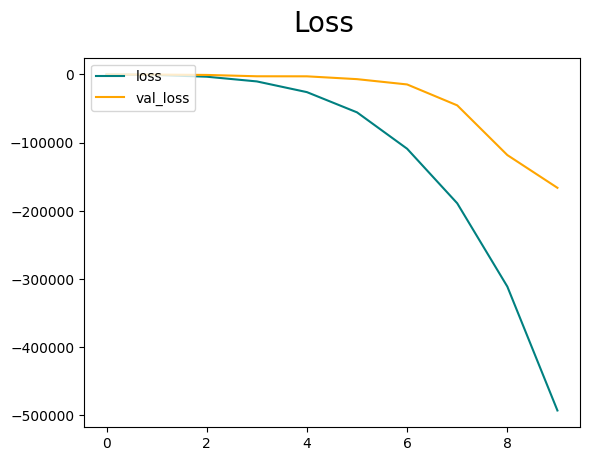

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()


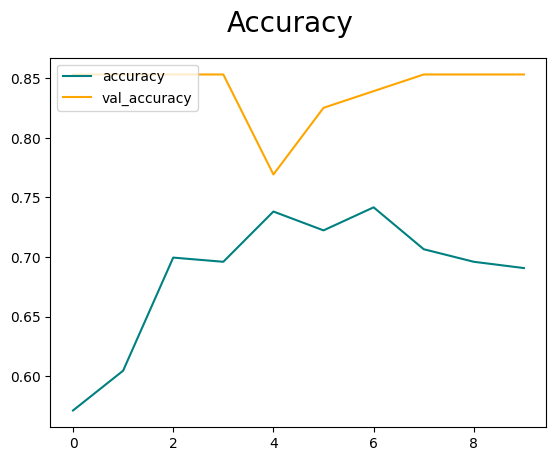

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()


### Testing the Model

In [30]:
img = image.load_img('dataset/images/700.jpg', target_size=(SIZE, SIZE, 3))

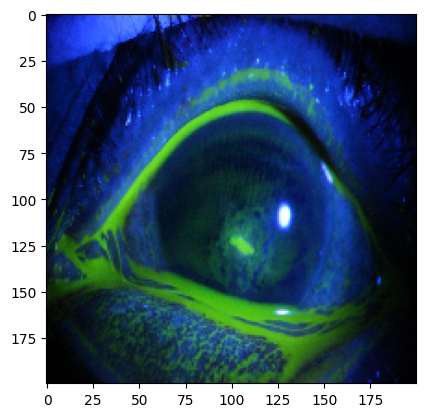

In [31]:
img = image.img_to_array(img)
img = img/255
plt.imshow(img)

In [32]:
img = np.expand_dims(img, axis=0)

In [33]:
img

array([[[[0.01176471, 0.02352941, 0.05882353],
         [0.01176471, 0.02745098, 0.07450981],
         [0.00784314, 0.01568628, 0.09803922],
         ...,
         [0.        , 0.04705882, 0.23137255],
         [0.        , 0.03529412, 0.21568628],
         [0.01176471, 0.05098039, 0.2509804 ]],

        [[0.01176471, 0.03921569, 0.14901961],
         [0.00392157, 0.03529412, 0.1764706 ],
         [0.02352941, 0.03921569, 0.22352941],
         ...,
         [0.        , 0.03921569, 0.21568628],
         [0.01176471, 0.03921569, 0.20392157],
         [0.00784314, 0.05098039, 0.23137255]],

        [[0.01568628, 0.03529412, 0.25490198],
         [0.00784314, 0.04313726, 0.27450982],
         [0.03529412, 0.07450981, 0.34509805],
         ...,
         [0.00392157, 0.05098039, 0.20784314],
         [0.00784314, 0.04313726, 0.21176471],
         [0.00784314, 0.03921569, 0.21960784]],

        ...,

        [[0.00784314, 0.00784314, 0.01568628],
         [0.00392157, 0.00784314, 0.01568628]

In [34]:
img.shape

(1, 200, 200, 3)

In [35]:
classes = np.array(df.columns[1:])

In [36]:
proba = model.predict(img)

1/1 [==============================] - 0s 162ms/step


In [37]:
sorted_categories = np.argsort(proba[0])[::-1]

In [38]:
sorted_categories

array([2, 1, 0])

In [39]:
for i in range(3):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

grade (1.0)
type (1.0)
category (1.0)


In [40]:
_,acc = model.evaluate(X_test, y_test)
print("Accuracy: ", (acc * 100.0), "%")

5/5 [==============================] - 1s 164ms/step - loss: -166306.6562 - accuracy: 0.8531
Accuracy:  85.31468510627747 %


### Saving the Model

In [41]:
from keras.models import load_model
import os

In [42]:
model.save(os.path.join('models','model_two.h5'))